In [17]:
import numpy as np
import astropy
import healpy as hp
import pandas as pd
from desiutil.plots import plot_sky_binned


In [7]:
df = pd.read_csv('../bricks_data/galaxy_catalogue.csv')

,BrickID,RA,DEC,Target_type,Fitbits,Maskbits
count,3.208932e+07,3.208932e+07,3.208932e+07,3.208932e+07,3.208932e+07,3.208932e+07
mean,3.095429e+05,1.605056e+02,-4.808911e+00,2.419310e+00,1.108372e+02,2.096195e+02
std,1.401345e+05,1.143875e+02,2.682107e+01,6.736044e-01,4.714934e+02,1.283251e+03
min,2.365400e+04,1.129233e-05,-6.817323e+01,1.000000e+00,0.000000e+00,0.000000e+00
25%,2.002920e+05,4.916147e+01,-2.316660e+01,2.000000e+00,0.000000e+00,0.000000e+00
50%,3.351760e+05,1.555947e+02,6.848689e-01,3.000000e+00,0.000000e+00,0.000000e+00
75%,4.250940e+05,2.452153e+02,1.654192e+01,3.000000e+00,0.000000e+00,0.000000e+00
max,5.244120e+05,3.600000e+02,3.579478e+01,3.000000e+00,3.069000e+03,1.127600e+04


In [8]:
df.head()

,BrickID,RA,DEC,Target_type,Fitbits,Maskbits
0,120312,5.165116,-39.411469,2,1,0
1,120312,5.165771,-39.443575,3,1,0
2,120312,5.167412,-39.552630,2,1,0
3,120312,5.169102,-39.400914,3,1,0
4,120312,5.169548,-39.533226,3,1,0


In [9]:
df.describe()

,BrickID,RA,DEC,Target_type,Fitbits,Maskbits
count,3.208932e+07,3.208932e+07,3.208932e+07,3.208932e+07,3.208932e+07,3.208932e+07
mean,3.095429e+05,1.605056e+02,-4.808911e+00,2.419310e+00,1.108372e+02,2.096195e+02
std,1.401345e+05,1.143875e+02,2.682107e+01,6.736044e-01,4.714934e+02,1.283251e+03
min,2.365400e+04,1.129233e-05,-6.817323e+01,1.000000e+00,0.000000e+00,0.000000e+00
25%,2.002920e+05,4.916147e+01,-2.316660e+01,2.000000e+00,0.000000e+00,0.000000e+00
50%,3.351760e+05,1.555947e+02,6.848689e-01,3.000000e+00,0.000000e+00,0.000000e+00
75%,4.250940e+05,2.452153e+02,1.654192e+01,3.000000e+00,0.000000e+00,0.000000e+00
max,5.244120e+05,3.600000e+02,3.579478e+01,3.000000e+00,3.069000e+03,1.127600e+04


In [10]:
print(len(df.BrickID.unique()))

87308


In [11]:
print(df.shape)
duplicates_removed = df.drop_duplicates()

print(duplicates_removed.shape)

(32089320, 6)


TypeError: 'tuple' object is not callable

In [12]:

df = duplicates_removed

# Setting NSIDE values
NSIDE = 256
NPIX = hp.nside2npix(NSIDE)
print(
    "Approximate resolution at NSIDE {} is {:.2} deg".format(
        NSIDE, hp.nside2resol(NSIDE, arcmin=True) / 60
    )
)



Approximate resolution at NSIDE 256 is 0.23 deg


In [13]:
def raDec2thetaPhi(ra, dec):
    return (0.5 * np.pi - np.deg2rad(dec)), (np.deg2rad(ra))



### Density Estimate for LRG

Number of LRGs in Sample: 3359453
Mean LRGs per Pixel: 15.120411378161851


/Users/edgareggert/miniconda3/envs/astro/lib/python3.8/site-packages/healpy/projaxes.py:202: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  aximg = self.imshow(
/Users/edgareggert/miniconda3/envs/astro/lib/python3.8/site-packages/healpy/projaxes.py:541: UserWarning: 0.0 180.0 -180.0 180.0
  warnings.warn(
/Users/edgareggert/miniconda3/envs/astro/lib/python3.8/site-packages/healpy/projaxes.py:656: UserWarning: The interval between parallels is 30 deg -0.00'.
  warnings.warn(
/Users/edgareggert/miniconda3/envs/astro/lib/python3.8/site-packages/healpy/projaxes.py:664: UserWarning: The interval between meridians is 30 deg -0.00'.
  warnings.warn(


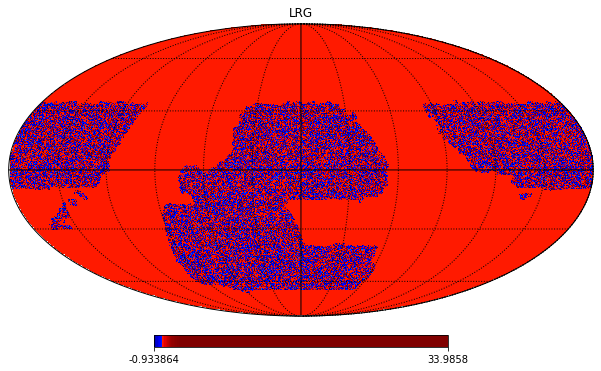

In [14]:
df_LRG = df[df["Target_type"] == 1]
ra_LRG = df_LRG["RA"].to_numpy(copy=True)
dec_LRG = df_LRG["DEC"].to_numpy(copy=True)
theta, phi = raDec2thetaPhi(ra_LRG, dec_LRG)

print("Number of LRGs in Sample:", len(ra_LRG))

m_LRG = np.zeros(NPIX)
LRG_pixel_indices = hp.ang2pix(NSIDE, theta,phi)

# Finding out unique indices and how often they appear --> shows the density of LRGs in this pixel
(unique, counts) = np.unique(LRG_pixel_indices, return_counts=True)

mean_LRG = counts.mean()
print("Mean LRGs per Pixel:", mean_LRG)
# Calculating Densities for every block
density_LRG = (counts / mean_LRG) - 1

m_LRG[unique] = density_LRG
hp.mollview(m_LRG, title="LRG", norm="hist",cmap="jet")
hp.graticule()



### Density Estimate for ELG


Number of ELG in Sample: 11837664
Mean ELG per Pixel: 50.19277149302081


/Users/edgareggert/miniconda3/envs/astro/lib/python3.8/site-packages/healpy/projaxes.py:202: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  aximg = self.imshow(
/Users/edgareggert/miniconda3/envs/astro/lib/python3.8/site-packages/healpy/projaxes.py:541: UserWarning: 0.0 180.0 -180.0 180.0
  warnings.warn(
/Users/edgareggert/miniconda3/envs/astro/lib/python3.8/site-packages/healpy/projaxes.py:656: UserWarning: The interval between parallels is 30 deg -0.00'.
  warnings.warn(
/Users/edgareggert/miniconda3/envs/astro/lib/python3.8/site-packages/healpy/projaxes.py:664: UserWarning: The interval between meridians is 30 deg -0.00'.
  warnings.warn(


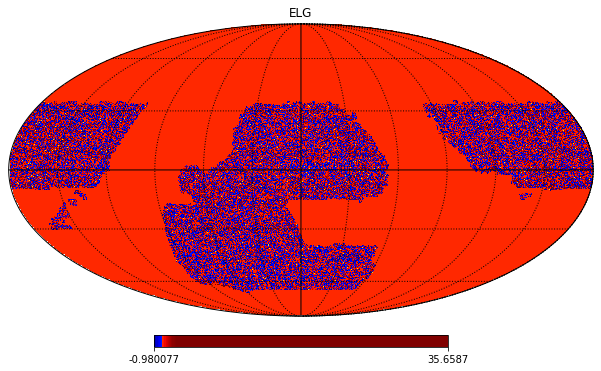

In [15]:

df_ELG = df[df["Target_type"] == 2]
ra_ELG = df_ELG["RA"].to_numpy(copy=True)
dec_ELG = df_ELG["DEC"].to_numpy(copy=True)
theta, phi = raDec2thetaPhi(ra_ELG, dec_ELG)


print("Number of ELG in Sample:", len(ra_ELG))

m_ELG = np.zeros(NPIX)
ELG_pixel_indices = hp.ang2pix(NSIDE, theta, phi)

# Finding out unique indices and how often they appear --> shows the density of LRGs in this pixel
# Future: Dont take unique, but also count zero pixels
(unique, counts) = np.unique(ELG_pixel_indices, return_counts=True)

mean_ELG = counts.mean()
print("Mean ELG per Pixel:", mean_ELG)

# Calculating Densities for every block
density_ELG = (counts / mean_ELG) - 1

m_ELG[unique] = density_ELG
hp.mollview(m_ELG, title="ELG", norm="hist",cmap="jet")
hp.graticule()





### Density Estimate for QSO


Number of QSO in Sample: 16758944
Mean QSO per Pixel: 70.32885427245336


/Users/edgareggert/miniconda3/envs/astro/lib/python3.8/site-packages/healpy/pixelfunc.py:1581: UserWarning: monopole: 7.20329e-19  dipole: lon: -18.4296, lat: -69.8908, amp: 0.00823526
  warnings.warn(
/Users/edgareggert/miniconda3/envs/astro/lib/python3.8/site-packages/healpy/projaxes.py:202: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  aximg = self.imshow(
/Users/edgareggert/miniconda3/envs/astro/lib/python3.8/site-packages/healpy/projaxes.py:541: UserWarning: 0.0 180.0 -180.0 180.0
  warnings.warn(
/Users/edgareggert/miniconda3/envs/astro/lib/python3.8/site-packages/healpy/projaxes.py:656: UserWarning: The interval between parallels is 30 deg -0.00'.
  warnings.warn(
/Users/edgareggert/miniconda3/envs/astro/lib/python3.8/site-packages/healpy/projaxes.py:664: UserWarning: The interval between meridians is 30 de

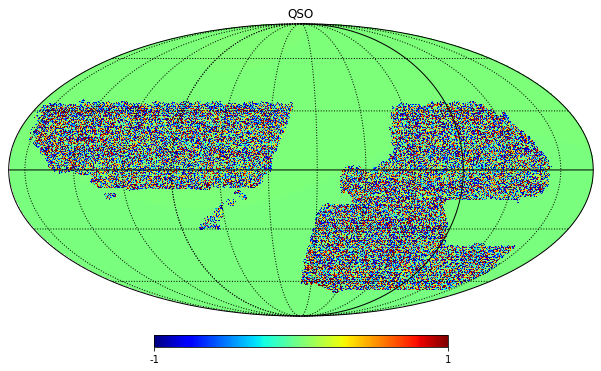

In [42]:

df_QSO = df[df["Target_type"] == 3]
ra_QSO = df_QSO["RA"].to_numpy(copy=True)
dec_QSO = df_QSO["DEC"].to_numpy(copy=True)
theta, phi = raDec2thetaPhi(ra_QSO, dec_QSO)


print("Number of QSO in Sample:", len(ra_QSO))

m_QSO = np.zeros(NPIX)
QSO_pixel_indices = hp.ang2pix(NSIDE, theta, phi)

# Finding out unique indices and how often they appear --> shows the density of LRGs in this pixel
(unique, counts) = np.unique(QSO_pixel_indices, return_counts=True)

mean_QSO = counts.mean()
print("Mean QSO per Pixel:", mean_QSO)

# Calculating Densities for every block
density_QSO = (counts / mean_QSO) - 1

m_QSO[unique] = density_QSO
hp.mollview(m_QSO, title="QSO", min=-1, max=1,cmap="jet", notext=False, bgcolor='white', rot=(100,0,0), badcolor='white', remove_dip=True, remove_mono=True)
hp.graticule()


In [44]:
from healpy.newvisufunc import projview, newprojplot
projview(m_QSO)

ImportError: cannot import name 'projview' from 'healpy.newvisufunc' (/Users/edgareggert/miniconda3/envs/astro/lib/python3.8/site-packages/healpy/newvisufunc.py)

In [ ]:
ax = plot_sky_binned(ra_QSO, dec_QSO, plot_type='healpix', max_bin_area=0.25, verbose=True, cmap='jet')
